In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

file = 'save'
train_size = 78*10**6
d = 5

#### Trend of loss & Sqc

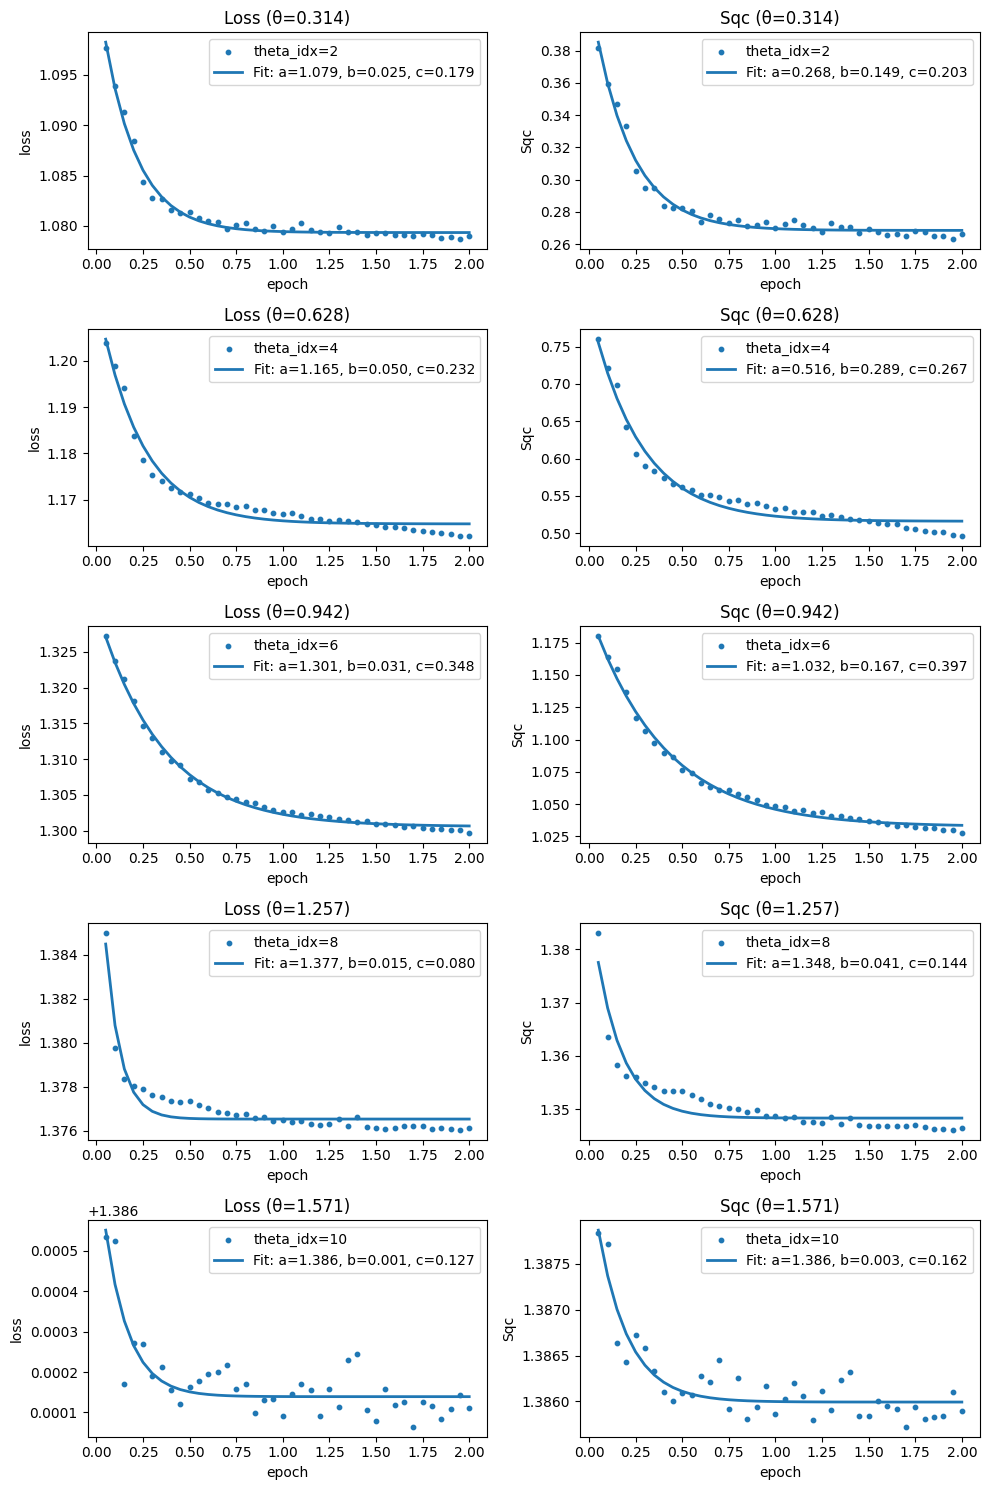

In [21]:
epoch_max = 1
cut_off = 1 # at least cut off the first point, since this is the initial loss before training

# Define fitting function
def exp_decay(x, a, b, c):
    return a + b * np.exp(-x / c)

fitting_result = {}

# Define theta indices to process
theta_indices = [2,4,6,8,10]

# Convert theta_idx to actual theta values
theta_values_all = torch.linspace(0, torch.pi/2, 11)
theta_values = [theta_values_all[idx].item() for idx in theta_indices]

# Create subplot grid: rows for different theta, columns for loss/Sqc
fig, axes = plt.subplots(nrows=len(theta_indices), ncols=2, figsize=(10, 3*len(theta_indices)))
if len(theta_indices) == 1:
    axes = axes.reshape(1, -1)  # Ensure 2D array for single row

for i, theta_idx in enumerate(theta_indices):
    l_train = torch.load(f'{file}/record/epoch={epoch_max}_d={d}_theta_idx={theta_idx}_size{train_size}_train.pt')
    l_test = torch.load(f'{file}/record/epoch={epoch_max}_d={d}_theta_idx={theta_idx}_size{train_size}_test.pt')
    Sqc_test = l_test['msk off Sqc']
    loss_train = l_train['loss']
    loss_test = l_test['loss']

    # Fit test loss
    x_loss = np.arange(len(loss_test))[cut_off:]/20
    y_loss = np.array(loss_test)[cut_off:]
    popt_loss, pcov_loss = curve_fit(exp_decay, x_loss, y_loss, p0=[1,1,1])
    # Fit test Sqc
    x_Sqc = np.arange(len(Sqc_test))[cut_off:]/20
    y_Sqc = np.array(Sqc_test)[cut_off:]
    popt_Sqc, pcov_Sqc = curve_fit(exp_decay, x_Sqc, y_Sqc, p0=[1,1,1])
    fitting_result[theta_idx] = {
        'loss': {
            'a': popt_loss[0],
            'b': popt_loss[1],
            'c': popt_loss[2]
        },
        'Sqc': {
            'a': popt_Sqc[0],
            'b': popt_Sqc[1],
            'c': popt_Sqc[2]
        }
    }
    
    # Loss plot (left column)
    axes[i, 0].scatter(x_loss, y_loss, s=10, label=f'theta_idx={theta_idx}')
    axes[i, 0].plot(x_loss, exp_decay(x_loss, *popt_loss), linewidth=2, 
                    label=f'Fit: a={popt_loss[0]:.3f}, b={popt_loss[1]:.3f}, c={popt_loss[2]:.3f}')
    axes[i, 0].set_xlabel('epoch')
    axes[i, 0].set_ylabel('loss')
    axes[i, 0].legend()
    axes[i, 0].set_title(f'Loss (θ={theta_values[i]:.3f})')
    # axes[i, 0].set_ylim(1.07, 1.39)  # Set y-axis range for loss plots
    
    # Sqc plot (right column)
    axes[i, 1].scatter(x_Sqc, y_Sqc, s=10, label=f'theta_idx={theta_idx}')
    axes[i, 1].plot(x_Sqc, exp_decay(x_Sqc, *popt_Sqc), linewidth=2,
                    label=f'Fit: a={popt_Sqc[0]:.3f}, b={popt_Sqc[1]:.3f}, c={popt_Sqc[2]:.3f}')
    axes[i, 1].set_xlabel('epoch')
    axes[i, 1].set_ylabel('Sqc')
    axes[i, 1].legend()
    axes[i, 1].set_title(f'Sqc (θ={theta_values[i]:.3f})')
    # axes[i, 1].set_ylim(0.25, 1.3)  # Set y-axis range for Sqc plots

plt.tight_layout()
plt.show()

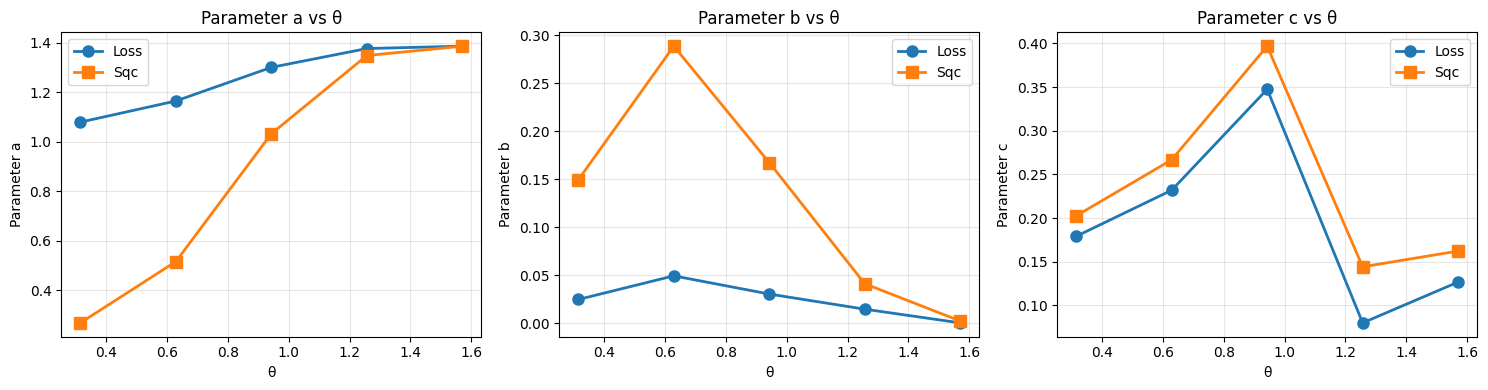

In [22]:
# Plot fitted parameters vs theta
# Convert theta_idx to actual theta values
theta_values_all = torch.linspace(0, torch.pi/2, 11)
theta_values = [theta_values_all[idx].item() for idx in theta_indices]

# Extract fitted parameters
loss_a = [fitting_result[idx]['loss']['a'] for idx in theta_indices]
loss_b = [fitting_result[idx]['loss']['b'] for idx in theta_indices]
loss_c = [fitting_result[idx]['loss']['c'] for idx in theta_indices]

Sqc_a = [fitting_result[idx]['Sqc']['a'] for idx in theta_indices]
Sqc_b = [fitting_result[idx]['Sqc']['b'] for idx in theta_indices]
Sqc_c = [fitting_result[idx]['Sqc']['c'] for idx in theta_indices]

# Create three separate figures
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot parameter a
axes[0].plot(theta_values, loss_a, 'o-', label='Loss', linewidth=2, markersize=8)
axes[0].plot(theta_values, Sqc_a, 's-', label='Sqc', linewidth=2, markersize=8)
axes[0].set_xlabel('θ')
axes[0].set_ylabel('Parameter a')
axes[0].set_title('Parameter a vs θ')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot parameter b
axes[1].plot(theta_values, loss_b, 'o-', label='Loss', linewidth=2, markersize=8)
axes[1].plot(theta_values, Sqc_b, 's-', label='Sqc', linewidth=2, markersize=8)
axes[1].set_xlabel('θ')
axes[1].set_ylabel('Parameter b')
axes[1].set_title('Parameter b vs θ')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot parameter c
axes[2].plot(theta_values, loss_c, 'o-', label='Loss', linewidth=2, markersize=8)
axes[2].plot(theta_values, Sqc_c, 's-', label='Sqc', linewidth=2, markersize=8)
axes[2].set_xlabel('θ')
axes[2].set_ylabel('Parameter c')
axes[2].set_title('Parameter c vs θ')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
